In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('stroopdata.csv')

### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

> Dependent variable is the reaction time since it depends on how quickly the test taker is able to read out all words.

> Independent variable is the congruency of the color and text



(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

*** We can perform parametric tests for this task such as the paired t-test but they involve assumptions about the  distribution of the underlying property (e.g normal distribution, symmetry, no outliers, etc.), and if those assumptions are not met we might get unreliable results. However, we can instead use non-parametric approaches such as bootstrapping to find the statistic that best estimates the parameter: in this case 'whether it takes more time to read the incongruent words or not'. We can then bootsrap the difference in population's time mean to simulate a sampling distribution and then use it to select the appropriate hypothesis.*** [5]

#### Assumptions:

Similar to other non-parametric approaches bootstrapping does not assume the population mean to be normally distributed. [5]

> The major assumption behind bootstrapping is that the sample distribution is a good approximation of the population distribution. [5]

#### Hypothesis

> **Null Hypothesis:** The null would be that the participants took equal or even less time to read incongruent words than congruent words.
                        **$µ_{Incongruent}$**  ≤ **$µ_{congruent}$**
                        


> **Alternate Hypothesis:** The alternate would be that the participants took longer to read incongruent words as compared to congruent words. 
                        **$µ_{Incongruent}$**  > **$µ_{congruent}$**
                        
Where µ is the population's time mean

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [3]:
# Perform the analysis here
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
t_con_mean = np.mean(df.Congruent)
t_con_mean

14.051124999999999

In [5]:
t_inc_mean = np.mean(df.Incongruent)
t_inc_mean

22.015916666666666

In [6]:
std_con = np.std(df.Congruent,ddof=1) ##ddof = 1 for sample data
std_con

3.5593579576451955

In [7]:
std_incon = np.std(df.Incongruent,ddof=1)
std_incon

4.7970571224691376

In [8]:
obs_diff = t_inc_mean - t_con_mean
obs_diff

7.9647916666666667

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [9]:
# Build the visualizations here

Text(0,0.5,'Count')

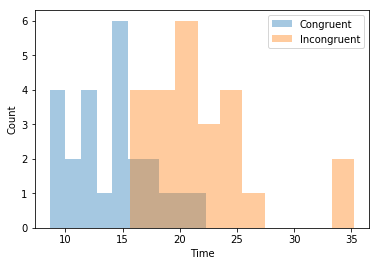

In [10]:
p1=plt.hist(df.Congruent,alpha=0.4)
p2=plt.hist(df.Incongruent,alpha=0.4)
plt.legend(('Congruent','Incongruent'))
plt.xlabel('Time')
plt.ylabel('Count')



### The distribution shows it basically took more time to read the incongruent words as compared to the congruent words.

Text(0,0.5,'Count')

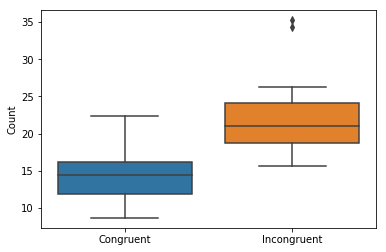

In [11]:
import seaborn as sns
sns.boxplot(data=df.iloc[:,0:2])
plt.ylabel('Count')


### The box plot also shows the same thing with incongruent reading times being higher as compared to congruent. It also shows the presence of outliers in the incongruent times.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

### The alpha rate is 5%. We would simulate a sampling distribution using bootstrapping and check if our statistic came from the null or alternate.

In [12]:
# Perform the statistical test here
t_diff=[]
for _ in range(0,10000):
    df_sample = df.sample(df.shape[0],replace=True)
    t_diff.append(df_sample.Incongruent.mean() - df_sample.Congruent.mean())

(array([  6.00000000e+00,   1.20000000e+02,   1.00000000e+03,
          2.84900000e+03,   3.30300000e+03,   1.98800000e+03,
          6.17000000e+02,   1.06000000e+02,   9.00000000e+00,
          2.00000000e+00]),
 array([  4.217875,   5.083875,   5.949875,   6.815875,   7.681875,
          8.547875,   9.413875,  10.279875,  11.145875,  12.011875,
         12.877875]),
 <a list of 10 Patch objects>)

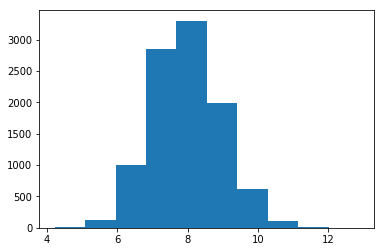

In [13]:
plt.hist(t_diff)


#### Now creating a sampling distribution using the standard deviation of the simulated results and centering it at 0. 

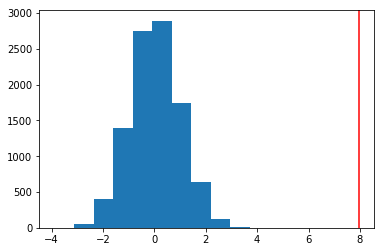

In [14]:
t_diff=np.array(t_diff)
nulls=np.random.normal(0,t_diff.std(),t_diff.size)
plt.hist(nulls)
plt.axvline(obs_diff,color='red')

The observed statistic does not seem to be coming from the null.

In [15]:
p = (nulls > obs_diff).mean()
p

0.0

### p <= 0.05 therefore we reject null. 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

As it appeared above the observed statistic does not seem to be coming from the null and therefore we reject the null hypothesis. An alternative task would be to do a same sort of reaction time test where the effect would rather be to turn the word upside down.

## References

1. https://www.thestudentroom.co.uk/showthread.php?t=301293
2. https://quizlet.com/72519003/stroop-effect-flash-cards/
3. https://rstudio-pubs-static.s3.amazonaws.com/118060_fcdc77aa7ffb452bb4cc8b67021d973a.html
4. https://python-graph-gallery.com/30-basic-boxplot-with-seaborn/
5. https://web.stanford.edu/class/psych252/tutorials/doBootstrapPrimer.pdf
